## Importing the classes, etc:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from xrayproject import segmentation_zero 

In [3]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from xrayproject.utils import load_train, load_masks
from xrayproject.preprocessing import normalize, flip_resize, resize_test
import matplotlib.pyplot as plt
from tensorflow_examples.models.pix2pix import pix2pix

## Loading images:

In [6]:
path_image = '../raw_data/raw_PRC/CXR_png/'
path_mask = '../raw_data/raw_PRC/CXR_mask/'

masks, targets, ID = load_masks(100, get_all = False, get_random = True, balanced = True, path = path_mask)

Using path:  ../raw_data/raw_PRC/CXR_mask/
Using bucket 
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0653_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0617_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0660_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0630_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0607_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0450_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0594_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0591_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0398_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0399_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0659_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0558_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0660_1_mas

In [7]:
images, IDs = load_train(ID, path = path_image)

Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0067_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0102_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0382_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0227_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0126_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0366_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0399_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0041_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0554_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0594_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0161_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0225_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0450_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0340_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0630_1

In [8]:
len(masks)
len(images)

100

### Looking at an image and at a mask:

(2843, 2679, 3)


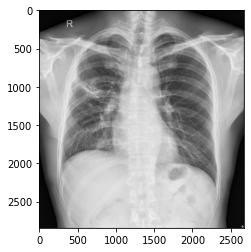

(2843, 2679, 1)


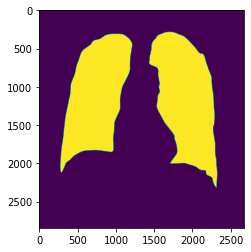

In [9]:
print(images[1].shape)
plt.imshow(images[1])
plt.show()
print(masks[1].shape)
plt.imshow(masks[1])
plt.show()

## Loading a model

In [10]:
resized = [flip_resize(images[i], masks[i], input_shape=(224, 224)) for i in range(len(images))]

In [11]:
resized[1][1].shape

TensorShape([224, 224, 1])

In [12]:
seg_model = segmentation_zero.Segmentation_UNET()

In [13]:
seg_model.base_model()

In [14]:
seg_model.unet_model()

In [15]:
seg_model.initialize_model()

Initializing model...


In [16]:
seg_model.train(images, masks, targets)

Preprocessing...
Initializing model...
Starting train..
Epoch 1/10
5/5 [==============================] - 17s 3s/step - loss: 0.5647 - accuracy: 0.7408 - val_loss: 0.4982 - val_accuracy: 0.7444
Epoch 2/10
5/5 [==============================] - 13s 3s/step - loss: 0.3912 - accuracy: 0.7852 - val_loss: 0.3698 - val_accuracy: 0.7898
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 0.3219 - accuracy: 0.8129 - val_loss: 0.2531 - val_accuracy: 0.9062
Epoch 4/10
5/5 [==============================] - 14s 3s/step - loss: 0.2614 - accuracy: 0.8735 - val_loss: 0.1831 - val_accuracy: 0.9536
Epoch 5/10
5/5 [==============================] - 13s 3s/step - loss: 0.2221 - accuracy: 0.9142 - val_loss: 0.1408 - val_accuracy: 0.9560
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 0.1867 - accuracy: 0.9415 - val_loss: 0.1196 - val_accuracy: 0.9581
Epoch 7/10
5/5 [==============================] - 13s 3s/step - loss: 0.1655 - accuracy: 0.9521 - val_loss: 0.1119 -

### Visualizing the UNET-generated masks:

#### First, an example from the set already:

In [21]:
def unet_to_mask_img(raw_lung_xray):
    img_funct = seg_model.model.predict(raw_lung_xray[tf.newaxis, ...]).squeeze()
    img_funct = np.sign(img_funct)
    img_funct = (1+np.resize(img_funct, (224, 224, 1)))/2
    return img_funct

# plt.imshow(unet_to_mask_img(X_test[1]))
# plt.show()

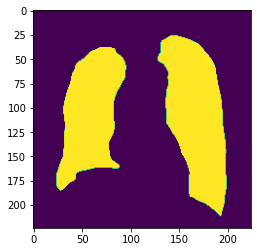

In [23]:
xray_1 = tf.image.resize(masks[0]/255, (224, 224))
plt.imshow(xray_1)
plt.show()

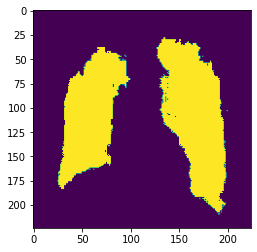

In [22]:
plt.imshow(unet_to_mask_img(xray_1))
plt.show()

#### Now, looking at some outside of the initial data-set. First step: load new X-ray images and new lung-masks:

In [30]:
new_masks, new_targets, new_ID = load_masks(10, get_all = False, get_random = True, balanced = True, path = path_mask)

Using path:  ../raw_data/raw_PRC/CXR_mask/
Using bucket 
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0470_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0478_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0559_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0568_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0596_1_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0164_0_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0241_0_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0018_0_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0258_0_mask.png
Loading local file:  ../raw_data/raw_PRC/CXR_mask/CHNCXR_0146_0_mask.png


In [31]:
new_images, new_IDs = load_train(new_ID, path = path_image)

Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0596_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0470_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0568_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0146_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0018_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0241_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0164_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0258_0.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0559_1.png
Loading local file:  ../raw_data/raw_PRC/CXR_png/CHNCXR_0478_1.png


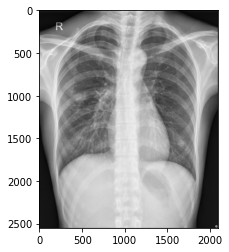

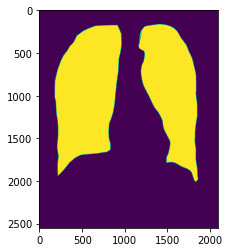

In [33]:
plt.imshow(new_images[0])
plt.show()
plt.imshow(new_masks[0])
plt.show()

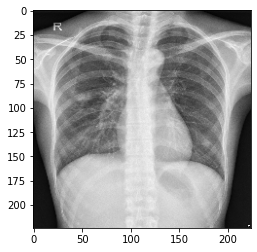

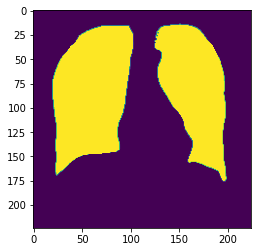

In [36]:
new_xray_imgs = [tf.image.resize(new_images[i]/255, (224, 224)) for i in range(len(new_images))]
new_xray_masks = [tf.image.resize(new_masks[i]/255, (224, 224)) for i in range(len(new_images))]

plt.imshow(new_xray_imgs[0])
plt.show()

plt.imshow(new_xray_masks[0])
plt.show()

#### Now, we run the model on the new X-ray to see what the model generates for its mask and visually compare it to the "actual" mask:

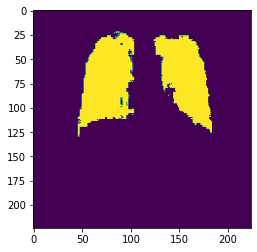

In [37]:
plt.imshow(unet_to_mask_img(new_xray_imgs[5]))
plt.show()

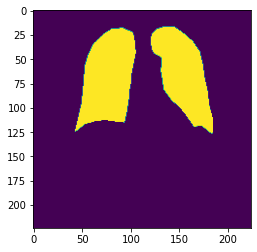

In [39]:
plt.imshow(new_xray_masks[5])
plt.show()

# _If_ the below cell runs 1+1 and returns 2, _then_ the fully-collapsed notebook will have run, end-to-end without interruption/error. Do we have an interruption/bug/error?

In [20]:
1+1

2